![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 17 - Non-parametric Clustering </center>
### <center> DBSCAN </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/17_NonparametricClustering/MainDBSCAN.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.cm

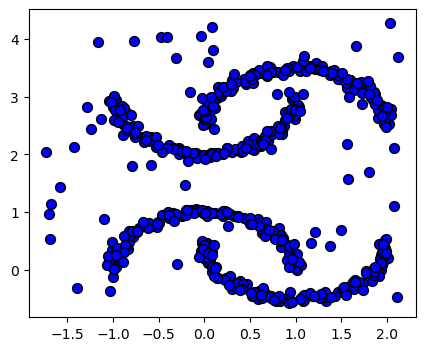

In [2]:
from sklearn.datasets import make_moons

N1     = 250
N2     = 50
mX1, _ = make_moons(N1, noise=.05)
mX2, _ = make_moons(N1, noise=.05)
mX2    = mX2 * [1, -1] + [0, 3]
mX3    = np.random.rand(N2, 2) * [4, 5] - [1.75, 2/3]
mX     = np.r_[mX1, mX2, mX3]

plt.figure(figsize=(5, 4))
plt.scatter(mX[:,0], mX[:,1], s=50, c='b', edgecolor='k')
plt.show()

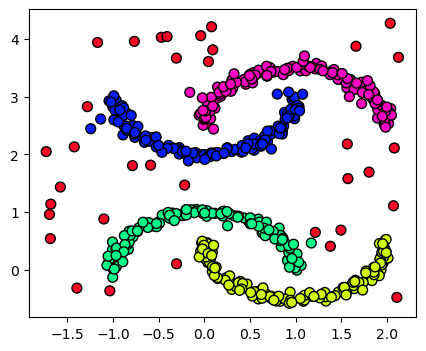

In [3]:
from sklearn.cluster import DBSCAN

vC = DBSCAN(eps=.2, min_samples=4).fit_predict(mX)
Nc = len(np.unique(vC))

plt.figure (figsize=(5, 4))
plt.scatter(mX[:,0], mX[:,1], s=50, c=vC, edgecolor='k', cmap=matplotlib.cm.get_cmap('gist_rainbow', Nc))
plt.show   ()

In [4]:
def PlotDBSCAN(r, Z):
    vC = DBSCAN(eps=r, min_samples=Z).fit_predict(mX)
    Nc = vC.max()

    plt.figure  (figsize=(5, 4))
    plt.scatter (mX[:,0], mX[:,1], s=50, c=vC, edgecolor='k', cmap=matplotlib.cm.get_cmap('gist_rainbow', Nc+2), vmin=-3/2, vmax=Nc+1/2)
    plt.colorbar()

In [5]:
from ipywidgets import interact, IntSlider, FloatSlider, Layout

zSlider = IntSlider  (min=1,    max=10, step=1,    value=1,    layout=Layout(width='80%'))
rSlider = FloatSlider(min=0.05, max=.5, step=0.05, value=0.05, layout=Layout(width='80%'))
interact(PlotDBSCAN, r=rSlider, Z=zSlider)
plt.show()

interactive(children=(FloatSlider(value=0.05, description='r', layout=Layout(width='80%'), max=0.5, min=0.05, …